**<h2><center>Week 5 Assignment </center></h2>**
<h4><center>Dikshya Shrestha</center></h4>
<h4><center>Presidential Graduate School</center></h4>
<h4><center>PRG 330: Python Programming</center></h4>
<h4><center>Professor Tek Raj Pant </center></h4>
<h4><center>February 8, 2025</center></h4>

<img src="C:\Users\user\Downloads\converted_image (1).jpg" height="1000px">


<img src="C:\Users\user\Pictures\image_solve.jpg" height="1000px">

In [17]:
import numpy as np

# Data: Price (P) and Demand (D)
P = np.array([10, 15, 20, 25, 30])  # Price
D = np.array([500, 450, 400, 350, 300])  # Demand

# Mean of P and D
P_mean = np.mean(P)
D_mean = np.mean(D)

# Calculate the slope (m) and intercept (c)
numerator = np.sum((P - P_mean) * (D - D_mean))
denominator = np.sum((P - P_mean) ** 2)
m = numerator / denominator
c = D_mean - (m * P_mean)

# Print the equation of the regression line
print(f"Linear Equation: D = {m:.2f}P + {c:.2f}")

# Predict Demand when Price is 37.6
P_new = 37.6
D_pred = m * P_new + c
print(f"Predicted Demand when Price is 37.6: D = {D_pred:.2f}")


Linear Equation: D = -10.00P + 600.00
Predicted Demand when Price is 37.6: D = 224.00


<img src="C:\Users\user\Pictures\Screenshots\Screenshot 2025-02-10 102843.png" height="1000px">


In [29]:
import pandas as pd

def calculate_disease_probability(df):
    # Step 1: Calculate Prior Probability P(D)
    total_population = df.loc['Total', 'Total']
    prior_D = df.loc['Yes (D)', 'Total'] / total_population  # P(D)
    
    # Step 2: Calculate Likelihood P(T+ | D)
    likelihood = df.loc['Yes (D)', 'Test Positive'] / df.loc['Yes (D)', 'Total']  # P(T+ | D)
    
    # Step 3: Compute Evidence P(T+)
    total_positive_tests = df.loc['Total', 'Test Positive']
    evidence = total_positive_tests / total_population  # P(T+)
    
    # Step 4: Apply Bayes' Theorem to compute P(D | T+)
    posterior = (likelihood * prior_D) / evidence  # P(D | T+)

    # Print each calculated value
    print(f"Prior Probability, P(D) = {prior_D:.4f}")
    print(f"Likelihood, P(T+ | D) = {likelihood:.4f}")
    print(f"Evidence, P(T+) = {evidence:.4f}")
    print(f"Posterior Probability, P(D | T+) = {posterior:.4f}")
    
    return posterior

# Creating the DataFrame with historical data
data = {
    "Test Positive": [40, 30, 70],
    "Test Negative": [10, 120, 130],
    "Total": [50, 150, 200]
}

index = ["Yes (D)", "No (~D)", "Total"]

df = pd.DataFrame(data, index=index)

# Calculate probability
calculate_disease_probability(df)

Prior Probability, P(D) = 0.2500
Likelihood, P(T+ | D) = 0.8000
Evidence, P(T+) = 0.3500
Posterior Probability, P(D | T+) = 0.5714


0.5714285714285715

# Regression (Predict House Price)
- This code uses linear regression to predict house prices based on their age. It loads the dataset and visualizes the relationship between house age and price. The data is split into training and testing sets. A linear regression model is trained and evaluated using the Mean Absolute Percentage Error. The regression line is plotted, and the equation is displayed. The model predicts the sale price for a sample house with an age of 10 years.

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


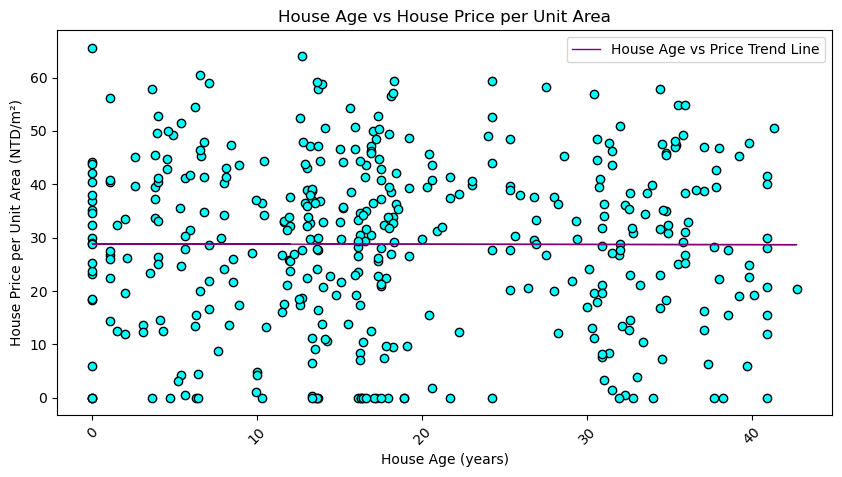

Regression Equation: y = -0.00x + 28.81
Predicted Sale Price for sample house: 28.78


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
df = pd.read_csv("data\\Real_Estate.csv")  # Use double backslashes for file path in Windows

# Display the first few rows to understand the data
display(df.head())

# Create the scatter plot for House Age vs House Price
plt.figure(figsize=(10, 5))
plt.scatter(
    df['House age'],  # Independent variable (House Age)
    df['House price of unit area'],  # Dependent variable (House Price)
    color='cyan',
    edgecolor='black'
)

# Fit a linear regression model to the data
X = df[['House age']]
y = df['House price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Plot the trend line (regression line)
plt.plot(df['House age'], model.predict(df[['House age']]), color='purple', linewidth=1, label='House Age vs Price Trend Line')

# Add title and labels
plt.xticks(rotation=45)
plt.xlabel('House Age (years)')
plt.ylabel('House Price per Unit Area (NTD/m²)')
plt.title('House Age vs House Price per Unit Area')
plt.legend()

# Show the plot
plt.show()

# Print the regression equation
m = model.coef_[0]
c = model.intercept_
print(f"Regression Equation: y = {m:.2f}x + {c:.2f}")

# Predict price for a sample house (e.g., House Age = 10 years)
sample_house_age = np.array([[10]])  # Example input
predicted_price = model.predict(sample_house_age)[0]

print(f"Predicted Sale Price for sample house: {predicted_price:,.2f}")


# GNB (Classify the Email as Spam or Not)
- The code loads an email dataset and converts the text messages into feature vectors using CountVectorizer. It counts word occurrences and n-grams while excluding common English stop words. The labels (Spam or Not Spam) are encoded using LabelEncoder. A Gaussian Naive Bayes model is trained on the transformed data to classify the emails. The create_binary_vector function is applied to each message to generate a binary vector representation. The model then predicts the probability of each email being spam. The output includes the email text, predicted label, and its sentence vector. Finally, it displays the results for the first 10 emails in a DataFrame.


In [25]:
import pandas as pd
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('data/email.csv')

# Convert text messages into feature vectors (word counts) with a broader vocabulary range
vectorizer = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1, 2), max_features=50)
X = vectorizer.fit_transform(df['Message'])

# Encode labels (Spam/Not Spam)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Category'])

# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X.toarray(), y)

# Function to create binary vector for each message based on the vectorizer's vocabulary
def create_binary_vector(email):
    email_vector = vectorizer.transform([email]).toarray()
    return email_vector[0]  # Return the binary vector

# Apply the create_binary_vector function to each message in the first 10 rows
df_first_10 = df.head(10)
df_first_10['Sentence Vector'] = df_first_10['Message'].apply(create_binary_vector)

# For each of the first 10 emails, get the prediction probabilities
output = []
for idx, row in df_first_10.iterrows():
    email = row['Message']
    label = row['Category']
    
    # Transform the email to its vector representation
    email_vector = row['Sentence Vector']
    
    # Get the probability of the email being spam (class 1)
    prob_spam = gnb.predict_proba([email_vector])[0][1]
    
    # Assign the predicted label based on the highest probability
    predicted_label = 'Spam' if prob_spam > 0.5 else 'Not Spam'
    
    # Add to the output list
    output.append([email, predicted_label, list(email_vector)])

# Create a DataFrame to display the results
output_df = pd.DataFrame(output, columns=["Text", "Label", "Sentence Vector"])

# Display the first 10 rows of the output
display(output_df)


C:\Users\user\AppData\Local\Temp\ipykernel_18276\1848351659.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_10['Sentence Vector'] = df_first_10['Message'].apply(create_binary_vector)


,Text,Label,Sentence Vector
0,"Go until jurong point, crazy.. Available only ...",Not Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
1,Ok lar... Joking wif u oni...,Not Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,U dun say so early hor... U c already then say...,Not Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"Nah I don't think he goes to usf, he lives aro...",Not Spam,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,FreeMsg Hey there darling it's been 3 week's n...,Not Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,Even my brother is not like to speak with me. ...,Not Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,As per your request 'Melle Melle (Oru Minnamin...,Not Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,WINNER!! As a valued network customer you have...,Spam,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,Had your mobile 11 months or more? U R entitle...,Spam,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, ..."


# Decision Tree Classifier 
- This analysis predicts heart attack risk using a decision tree model based on age, smoking status, and weight. A function is used to determine risk where individuals older than 65 or smokers over 45 are categorized as high risk. A dataset is created and label encoding is applied to convert risk categories into numerical values. The decision tree classifier is then trained and evaluated for accuracy. An inference function is built to predict the heart attack risk for any given input. The model's accuracy is calculated and the risk for a sample input of a 60-year-old smoker is predicted.



In [28]:
import pandas as pd
from IPython.display import display
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Create Dataset with Dynamic Risk Calculation
def determine_risk(age, smoker, weight):
    if age > 65:
        return "High Risk"
    elif smoker and age > 45:
        return "High Risk"
    else:
        return "Low Risk"

data = [
    [16, False, 55],
    [16, False, 65],
    [25, False, 72],
    [50, True, 46],
    [50, False, 68],
    [70, True, 90],
    [70, False, 35]
]

columns = ["Age", "Smoker", "Weight"]
df = pd.DataFrame(data, columns=columns)
df["Risk"] = df.apply(lambda row: determine_risk(row["Age"], row["Smoker"], row["Weight"]), axis=1)
display(df)

# 2. Encode Labels
label_encoder = LabelEncoder()
df["Risk"] = label_encoder.fit_transform(df["Risk"])

# 3. Prepare Features and Target
X = df[["Age", "Smoker", "Weight"]].fillna(-1)
y = df["Risk"]

# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 6. Evaluate Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# 7. Inference Function
def predict_heart_attack_risk(age, smoker=False, weight=None):
    sample_df = pd.DataFrame([[age, smoker, weight]], columns=["Age", "Smoker", "Weight"])
    sample_df.fillna(-1, inplace=True)
    prediction = clf.predict(sample_df)
    return label_encoder.inverse_transform(prediction)[0]

# 8. Example Inference
sample_input = [60, True, None]
prediction_result = predict_heart_attack_risk(*sample_input)
print(f"Predicted Heart Attack Risk for age 60 and a smoker is: {prediction_result}")


,Age,Smoker,Weight,Risk
0,16,False,55,Low Risk
1,16,False,65,Low Risk
2,25,False,72,Low Risk
3,50,True,46,High Risk
4,50,False,68,Low Risk
5,70,True,90,High Risk
6,70,False,35,High Risk


Model Accuracy: 100.00%
Predicted Heart Attack Risk for age 60 and a smoker is: High Risk


C:\Users\user\AppData\Local\Temp\ipykernel_18276\1918074088.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_df.fillna(-1, inplace=True)


- Idea for classification Reference\
Navlani, A. (2023, February). Python Decision Tree Classification Tutorial.Datacamp. https://www.datacamp.com/tutorial/decision-tree-classification-python
<img src= "C:\Users\user\Pictures\decision_tree_for_heart_attack.avif" height="1000px">